# SPDA SUMMATIVE ASSESSMENT QUESTION 2


## Webscrapping Using Reddit API


#### Where does the data come from?

The data was gotten through the Reddit website, under the subreddit health (r\health) - The data consists of all the health topic being discussed on the forum from 10/2/2024 - 11/15/2024.

#### Aim of study

The aim of this analysis is to identify the key topics and drivers of engagement in the subreddit(health) on the reddit platform.

In this analysis we will explore:
1. The most dicussed health topics.
2. Understand what influnences high engagement.
3. Analyse the contribution patterns of authors.
4. Determine the impact of sentiment analysis.

#### What are the variables of interest?

The variables of interst include: 

1. Title: The headline of the Reddit post that explains what the post is about.
2. Author: The Reddit username of the person who wrote the post.
3. Date: The day the topic was submitted on the forum.
4. Score: The total upvotes minus downvotes the post has received, showing how well the post was liked by the community.
5. Number of Comments (num_comments): The total number of comments made on the post, showing how much discussion it generated.


#### How was the data scrapped/collected?

To scrape data from the Reddit API, I first opened a reddit account, then I registered for API credentials via Reddit's developer portal. I got my client_id, client_secret and user_agent after the registration.

Praw was installed using "pip install praw" to enable scrapping from the Reddit website. Praw is a Python wrapper for the Reddit API, which makes authentication and JSON parsing easy.

Then I authenticated using client_id, client_secret, and user_agent.

After that, I used reddit.subreddit('health') to fetch the health post data. 


In [4]:
import praw

#Authentication
reddit = praw.Reddit(
    client_id="5Wv14SUqGs8ETZ8inzjcMg",
    client_secret="0zUUYuMLM2vBe2-XVIExAqochF5gQQ",
    user_agent="windows:my_app:1.0 (by /u/Life_Hat1137)",
    username="Life_Hat1137",  # Your Reddit username
    password="Ola07061193131"  # Your Reddit password
)

print("Authenticated as:", reddit.user.me())


Authenticated as: Life_Hat1137


#### Step 2 - Perform data preparation/cleaning

In [8]:
import praw
import pandas as pd
import arrow

#Submission data
health_submissions = []

#Submissions r/health
for submission in reddit.subreddit('health').hot(limit=500):
    d = {}
    d['id'] = submission.id
    d['title'] = submission.title
    d['num_comments'] = submission.num_comments
    d['score'] = submission.score
    d['upvote_ratio'] = submission.upvote_ratio
    d['domain'] = submission.domain
    d['gilded'] = submission.gilded
    d['num_crossposts'] = submission.num_crossposts
    d['nsfw'] = submission.over_18
    d['author'] = submission.author.name if submission.author else None
    d['subreddit'] = submission.subreddit.display_name
    
    # Convert created_utc to clear date WITH arrow
    d['date'] = arrow.get(submission.created_utc).format('YYYY-MM-DD')
    
    health_submissions.append(d)

##### Load the data set into a dataframe using pandas and save data set as a CSV file

In [10]:
df = pd.DataFrame(health_submissions)

print(df.head())

df.to_csv('health_reddit_data_with_dates_arrow.csv', index=False)

        id                                              title  num_comments  \
0  1gzgsd4  Learning CPR on manikins without breasts puts ...            13   
1  1gzdmbr  Antibiotic warning issued amid rise in global use             8   
2  1gz27i7  Salad topping recalled in 20 states over wheat...             0   
3  1gxrnbp  Vasectomies Rise 1,200% After Donald Trump Ele...           100   
4  1gy8msi  Nonalcoholic Fatty Liver Disease (NAFLD): What...             7   

   score  upvote_ratio              domain  gilded  num_crossposts   nsfw  \
0     56          0.83     theguardian.com       0               0  False   
1     84          0.99        newsweek.com       0               0  False   
2     60          0.95         nbcnews.com       0               0  False   
3   2197          0.97        newsweek.com       0               0  False   
4     93          0.96  foodrevolution.org       0               1  False   

       author subreddit        date  
0     newzee1    Health 

##### Display the number of rows and columns from the data set

In [12]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 395
Number of columns: 12


##### Loading the dataset

In [14]:
health_reddit = pd.read_csv('health_reddit_data_with_dates_arrow.csv')

##### Inspect the data

In [16]:
health_reddit

,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
0,1gzgsd4,Learning CPR on manikins without breasts puts ...,13,56,0.83,theguardian.com,0,0,False,newzee1,Health,2024-11-25
1,1gzdmbr,Antibiotic warning issued amid rise in global use,8,84,0.99,newsweek.com,0,0,False,newsweek,Health,2024-11-25
2,1gz27i7,Salad topping recalled in 20 states over wheat...,0,60,0.95,nbcnews.com,0,0,False,nbcnews,Health,2024-11-24
3,1gxrnbp,"Vasectomies Rise 1,200% After Donald Trump Ele...",100,2197,0.97,newsweek.com,0,0,False,newzee1,Health,2024-11-23
4,1gy8msi,Nonalcoholic Fatty Liver Disease (NAFLD): What...,7,93,0.96,foodrevolution.org,0,1,False,boppinmule,Health,2024-11-23
...,...,...,...,...,...,...,...,...,...,...,...,...
390,1g5z4rz,Weight loss drugs could help with alcohol and ...,1,45,0.91,cbsnews.com,0,0,False,CBSnews,Health,2024-10-17
391,1g5mydf,CVS and Walgreens are ailing. Here’s why,66,237,0.95,npr.org,0,0,False,Maxcactus,Health,2024-10-17
392,1g5m7qo,UK doctors to government: ‘Make the tobacco in...,0,41,0.95,euronews.com,0,0,False,euronews-english,Health,2024-10-17
393,1g55yfr,"Standing desks may be bad for your health, stu...",61,274,0.92,theguardian.com,0,0,False,DreamingDemon,Health,2024-10-16


In [72]:
health_reddit.columns

Index(['id', 'title', 'num_comments', 'score', 'upvote_ratio', 'domain',
       'gilded', 'num_crossposts', 'nsfw', 'author', 'subreddit', 'date'],
      dtype='object')

In [29]:
health_reddit.describe(include= 'all')

,id,title,num_comments,score,upvote_ratio,domain,gilded,num_crossposts,nsfw,author,subreddit,date
count,417,417,417.000000,417.000000,417.000000,417,417.0,417.000000,417,417,417,417
unique,417,414,NaN,NaN,NaN,114,NaN,NaN,2,112,1,45
top,1gt35fn,Sleepy during the day? You may be at higher ri...,NaN,NaN,NaN,nbcnews.com,NaN,NaN,False,nbcnews,Health,2024-10-22
freq,1,2,NaN,NaN,NaN,30,NaN,NaN,416,26,417,18
mean,NaN,NaN,25.839329,175.865707,0.919544,NaN,0.0,0.167866,NaN,NaN,NaN,NaN
std,NaN,NaN,47.085189,222.785591,0.105812,NaN,0.0,0.433704,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,0.190000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,33.000000,0.900000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,6.000000,89.000000,0.950000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,30.000000,243.000000,0.980000,NaN,0.0,0.000000,NaN,NaN,NaN,NaN


In [23]:
health_reddit.author.value_counts()

author
nbcnews                 25
nytopinion              19
euronews-english        19
CTVNEWS                 18
newzee1                 16
                        ..
bloomberglaw             1
Geodestamp               1
msnbc                    1
RaindropsAndCrickets     1
DreamingDemon            1
Name: count, Length: 111, dtype: int64

### Step 2: Perform Data Preparation And Cleaning

#### Steps to prepare, clean your data, or extract new features

The following steps were taken to prepare and clean the data.
1. Identifying if there are any missing data, fortunately there was none.
2. Removing unwanted columns.
3. Checking for outliers.
4. Converting all uppercase words to lowercase to improve consistency across the data and to simplify other steps in the data pipeline, like tokenization, stopword removal, and lemmatization.
5. I used `re` for text cleaning, `stopwords` to remove common words, `word_tokenize` for splitting text into words, and `WordNetLemmatizer` for standardizing word forms, enhancing data consistency and analysis.
6. The clean data was saved as a new csv file.

#### Missing data

The data showed no missing values.

In [25]:
#Missing values
print(df.isnull().sum()) 

id                0
title             0
num_comments      0
score             0
upvote_ratio      0
domain            0
gilded            0
num_crossposts    0
nsfw              0
author            0
subreddit         0
date              0
dtype: int64


The code below will remove unwanted columns

In [76]:
# Remove unwanted columns
columns_to_drop = ['nsfw', 'gilded', 'num_crossposts', 'domain', 'upvote_ratio']  # Example columns to drop
health_reddit.drop(columns=columns_to_drop, inplace=True
print(health_reddit.columns)

Index(['id', 'title', 'num_comments', 'score', 'author', 'subreddit', 'date'], dtype='object')


#### Checking for outliers

The scatterd plot highlights if there is an outliers in the score and comment variable. While most posts shows similarities with low score and number of comments. The result shows still shows an outlier with score above 2000, this is likely caused by a very engaging post with an unusually high score or comment count, deviating clearly from others.

In [ ]:
The outlier likely represents a highly engaging post with an unusually high score or comment count, deviating significantly from others.

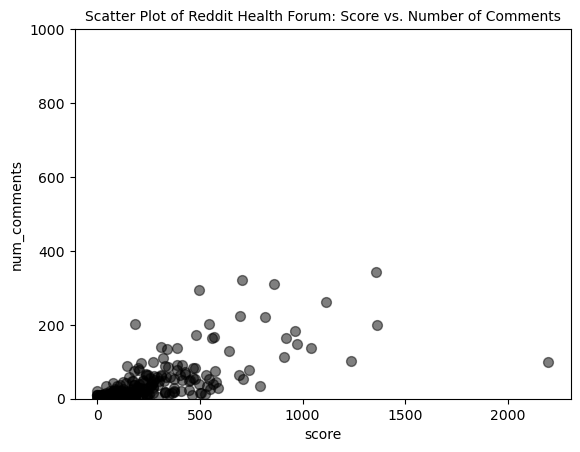

In [28]:
# Create the scatter plot
ax = health_reddit.plot.scatter(x='score', y='num_comments', s=50, c='k', alpha=0.5)

ax.set_ylim(0, 1000)  # Limit y-axis from 0 to 1,000
ax.set_title('Scatter Plot of Reddit Health Forum: Score vs. Number of Comments', fontsize=10)
plt.show()

Changing uppercase words to lowercase in the dataset this is important to improve the consistency of the dataset and reduce duplicates.

In [31]:
# Convert all words in the 'clean_title' column to lowercase
health_reddit['clean_title'] = health_reddit['title'].str.lower()

# Convert the 'author' column to lowercase
health_reddit['clean_author'] = health_reddit['author'].str.lower()
print(health_reddit[['clean_title', 'clean_author']].head())

                                         clean_title clean_author
0  learning cpr on manikins without breasts puts ...      newzee1
1  antibiotic warning issued amid rise in global use     newsweek
2  salad topping recalled in 20 states over wheat...      nbcnews
3  vasectomies rise 1,200% after donald trump ele...      newzee1
4  nonalcoholic fatty liver disease (nafld): what...   boppinmule


#### Additionl step

I used re, nltk libraries to clean text data by removing special characters, stopwords, tokenizing, and lemmatizing words for analysis.

In [33]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs and special characters
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and apply lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(cleaned_tokens)

# Apply the cleaning function to the text columns
health_reddit['clean_title_1'] = health_reddit['clean_title'].apply(clean_text)
health_reddit['clean_author_1'] = health_reddit['clean_author'].apply(clean_text)

# View the cleaned columns
print(health_reddit[['clean_title_1', 'clean_author_1']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                       clean_title_1 clean_author_1
0  learning cpr manikin without breast put woman ...         newzee
1     antibiotic warning issued amid rise global use       newsweek
2  salad topping recalled state wheat allergen co...        nbcnews
3           vasectomy rise donald trump election win         newzee
4  nonalcoholic fatty liver disease nafld cause l...     boppinmule


#### More data cleaning

In [38]:
cleaned_data_new = health_reddit[['id', 'num_comments','score','clean_author_1','date', 'clean_title_1']].copy()

In [42]:
cleaned_data_new.to_csv('cleaned_health_reddit_data_new.csv', index=False)

In [44]:
clean_data = pd.read_csv('cleaned_health_reddit_data_new.csv')

In [46]:
clean_data

,id,num_comments,score,clean_author_1,date,clean_title_1
0,1gzgsd4,13,56,newzee,2024-11-25,learning cpr manikin without breast put woman ...
1,1gzdmbr,8,84,newsweek,2024-11-25,antibiotic warning issued amid rise global use
2,1gz27i7,0,60,nbcnews,2024-11-24,salad topping recalled state wheat allergen co...
3,1gxrnbp,100,2197,newzee,2024-11-23,vasectomy rise donald trump election win
4,1gy8msi,7,93,boppinmule,2024-11-23,nonalcoholic fatty liver disease nafld cause l...
...,...,...,...,...,...,...
390,1g5z4rz,1,45,cbsnews,2024-10-17,weight loss drug could help alcohol opioid add...
391,1g5mydf,66,237,maxcactus,2024-10-17,cv walgreens ailing here
392,1g5m7qo,0,41,euronewsenglish,2024-10-17,uk doctor government make tobacco industry pay
393,1g55yfr,61,274,dreamingdemon,2024-10-16,standing desk may bad health study suggests


Getting sentiments for dataset

In [49]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Get sentiments for every column
health_reddit['sentiment'] = health_reddit['title'].apply(get_sentiment)

# Display
print(health_reddit[['title', 'sentiment']])



                                                 title  sentiment
0    Learning CPR on manikins without breasts puts ...   0.000000
1    Antibiotic warning issued amid rise in global use   0.000000
2    Salad topping recalled in 20 states over wheat...   0.000000
3    Vasectomies Rise 1,200% After Donald Trump Ele...   0.800000
4    Nonalcoholic Fatty Liver Disease (NAFLD): What...  -0.200000
..                                                 ...        ...
390  Weight loss drugs could help with alcohol and ...   0.136364
391           CVS and Walgreens are ailing. Here’s why   0.000000
392  UK doctors to government: ‘Make the tobacco in...   0.000000
393  Standing desks may be bad for your health, stu...  -0.700000
394  Doctor has warning over diet drinks, especiall...   0.000000

[395 rows x 2 columns]


### Step 3 - Exploratory Data analysis


##### Calculate the sum of num_comments and score.

In [55]:
total_sum = clean_data['num_comments'].sum()
print("Sum of num_comments:", total_sum)

total_counts = clean_data['score'].sum()
print("Sum of score:", total_counts)


Sum of num_comments: 10534
Sum of score: 69234


This result shows that:
1. The total comments made on the subreddit health post between 10/2/2024 - 11/15/2024 is 10775.
2. The total upvotes on the subreddit health forum between 10/2/2024 - 11/15/2024 is 73336

##### Calculate the means of num_comments, score.

In [57]:
mean_comments = clean_data['num_comments'].mean()
print("Mean num_comments:", mean_comments)

mean_score = clean_data['score'].mean()
print("Mean score:", mean_score)

Mean num_comments: 26.668354430379747
Mean score: 175.2759493670886


This result shows that:
1. The average number of comments per post is 25.839328537170264
2. The average engagement per post is 175.86570743405275

##### Calculate the range of num_comments, score.

In [66]:
range_comments = clean_data['num_comments'].max() - clean_data['num_comments'].min()
print("Range num_comments is", range_comments)

range_score = clean_data['score'].max() - clean_data['score'].min()
print("Range score:", range_score)

Range num_comments is 344
Range score: 2197


This shows that:
1. The range of comments shows the difference in engagemets, not all post had same number of engagements, some where more engaging than others.
2. The range of score shows a differnce in the popularity of the various discussion topics

##### Calculate the standard deviation of the num_commnents and the score.

In [68]:
standard_deviation_comments = clean_data["num_comments"].std()
print("Standard_deviation_comments:", standard_deviation_comments)

standard_deviation_score = clean_data["score"].std()
print("standard_deviation_score:",standard_deviation_score)

Standard_deviation_comments: 50.06547881130294
standard_deviation_score: 243.81527979959287


This shows that: 
1. The stanadard deviation of comments shows that most posts have a similar number of comments.
2. The standard deviation of score shows that the most post have scores close to average

#### Histograms

From the histograms below:

1. The post scores and number of comments highlights that certain posts gain much higher engagement compared to others.
2. Some posts went viral while most others did not.

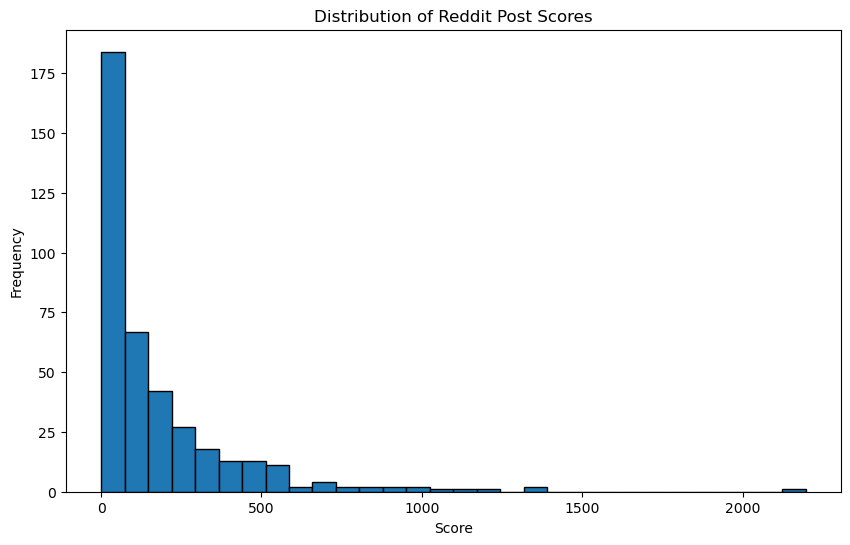

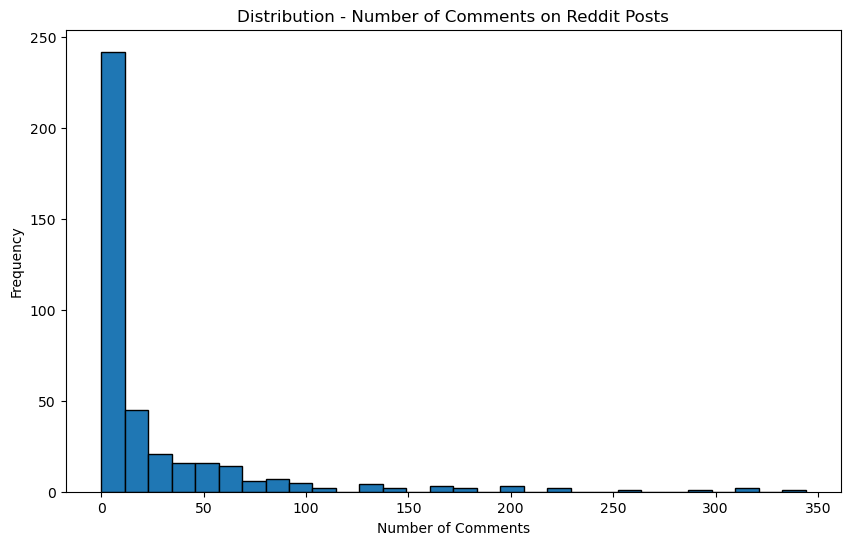

In [70]:
# Plot a histogram for the 'score' column
plt.figure(figsize=(10, 6))
plt.hist(clean_data['score'], bins=30, edgecolor='black')
plt.title('Distribution of Reddit Post Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Plot a histogram for the 'num_comments' column
plt.figure(figsize=(10, 6))
plt.hist(clean_data['num_comments'], bins=30, edgecolor='black')
plt.title('Distribution - Number of Comments on Reddit Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


In the histogram below we looked at the distribution of score across posts that contain key words - 'vaccine', 'cancer', 'outbreak', 'mental health', 'abortion

From the histogram we see that there is an unequal score across the individual posts with the unique key words. This highlights that some topics got more enegagements that others.

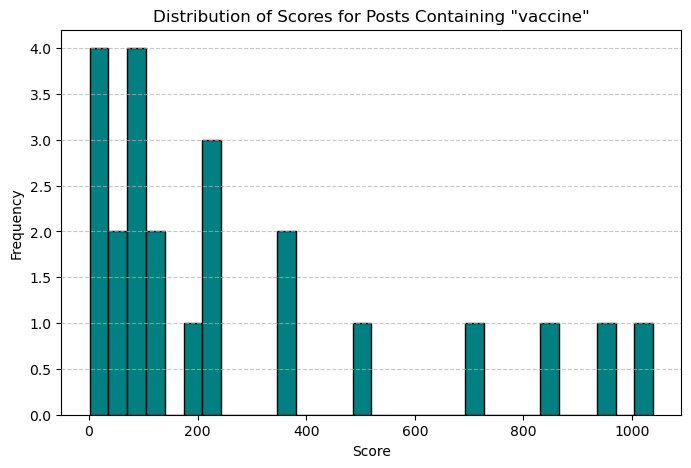

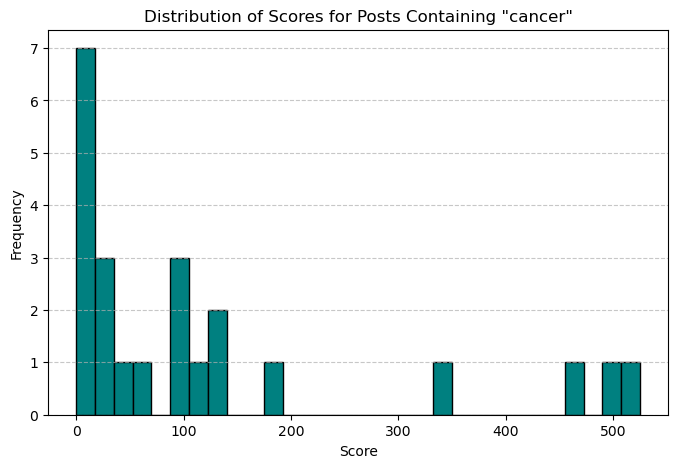

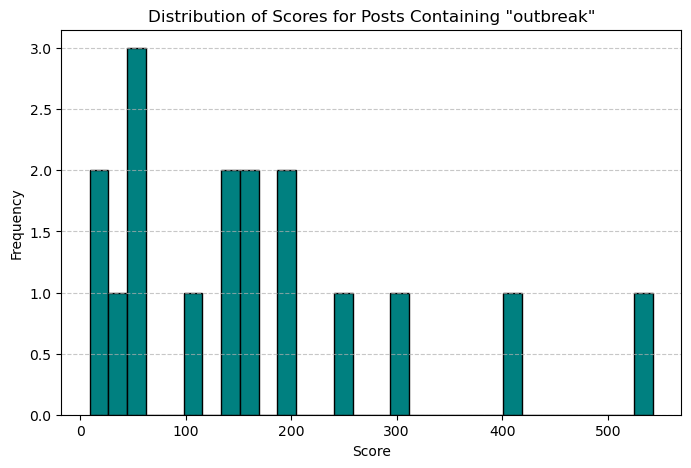

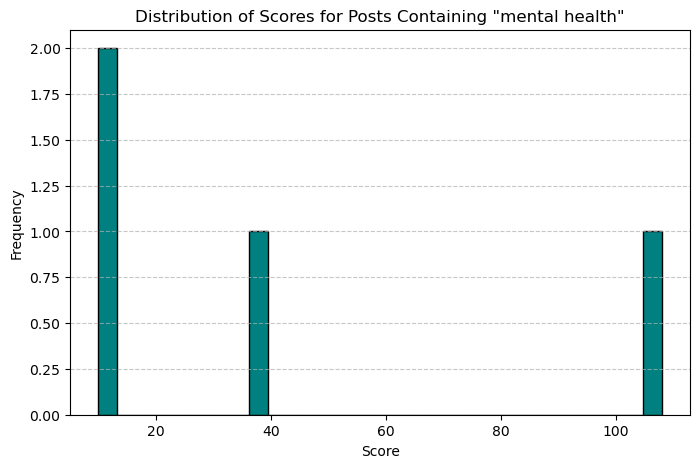

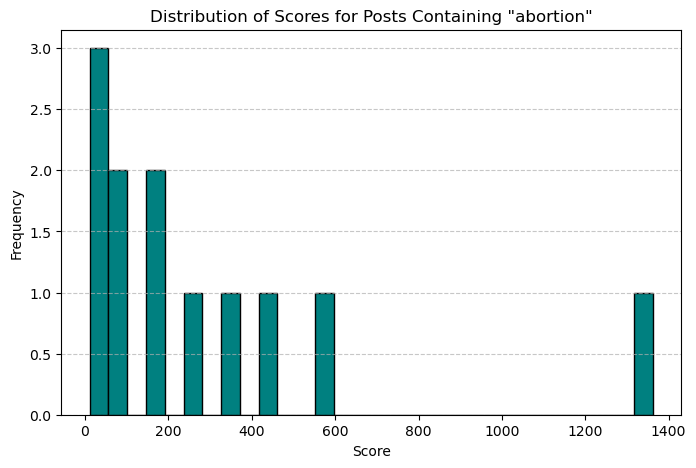

In [75]:
keywords = ['vaccine', 'cancer', 'outbreak', 'mental health', 'abortion']

for keyword in keywords:
    keyword_data =clean_data[clean_data['clean_title_1'].str.contains(keyword, case=False, na=False)]
    plt.figure(figsize=(8, 5))
    plt.hist(keyword_data['score'], bins=30, color='teal', edgecolor='black')
    plt.title(f'Distribution of Scores for Posts Containing "{keyword}"')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

The histogram below shows a Logarithmic Histogram for Score and Number of Comments.
The result shows us a clearer view of the patterns of engagement across topic and highlights the fact that some post are more engaging than others even when we compare with either score or number of comments.

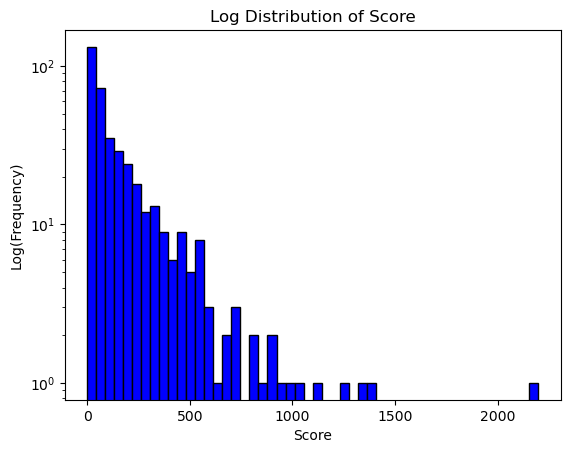

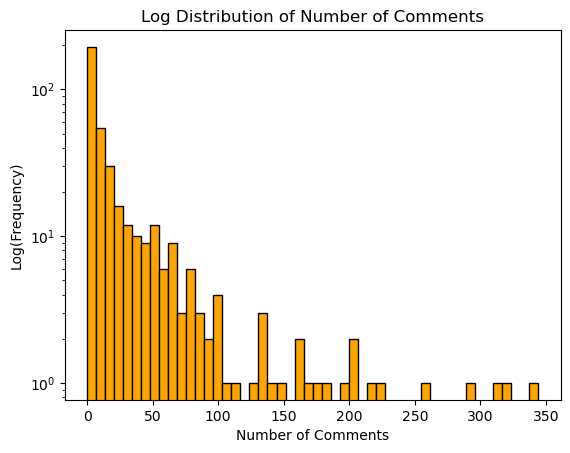

In [77]:
#Plot an histogram for the log distribution of score
plt.hist(clean_data['score'], bins=50, color='blue', edgecolor='black', log=True)
plt.title('Log Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Log(Frequency)')
plt.show()

#Plot an histogram for the log distribution of number of comments
plt.hist(clean_data['num_comments'], bins=50, color='orange', edgecolor='black', log=True)
plt.title('Log Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Log(Frequency)')
plt.show()



#### Scatter plots

From the scattered plot below:

1. The regression line shows a positive correlation between scores and number of comments.

2. Posts with higher scores tend to have more comments but the relationship is not perfect.

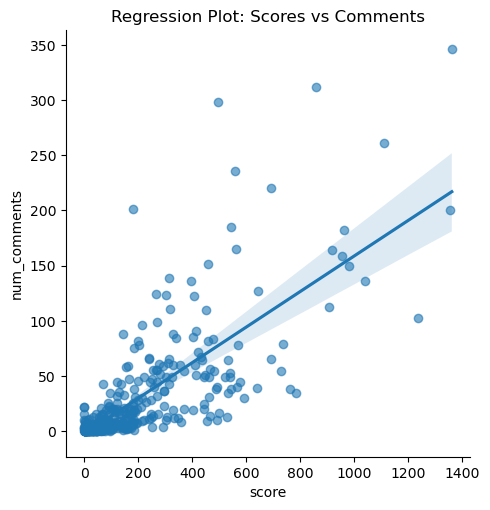

In [307]:
import seaborn as sns
sns.lmplot(x='score', y='num_comments', data=clean_data, scatter_kws={'alpha': 0.6})
plt.title('Regression Plot: Scores vs Comments')
plt.show()

The scattered plot below shows that some authors have more engagememts than others. Most authors have posts at lower scores under 200.
Few authors have very high-scoring posts with points above 800.

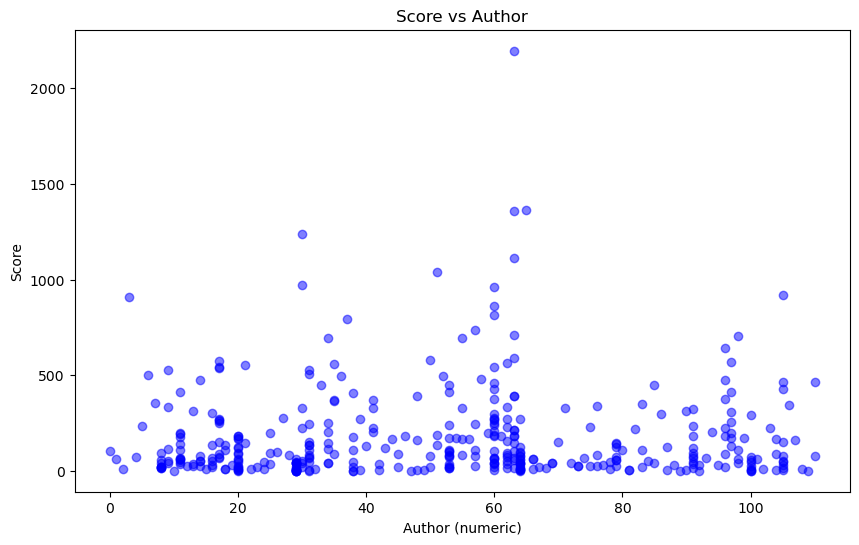

In [90]:
#Calculate the number of posts per author
author_post_count = clean_data['clean_author_1'].value_counts().reset_index()
author_post_count.columns = ['clean_author_1', 'num_posts']

# Merge together with original dataframe 
df = clean_data.merge(author_post_count, on='clean_author_1', how='left')

# Convert 'author' to numeric data (since correlation requires numerical data)
df['author_numeric'] = clean_data['clean_author_1'].astype('category').cat.codes

plt.figure(figsize=(10, 6))
plt.scatter(df['author_numeric'], df['score'], color='blue', alpha=0.5)
plt.title('Score vs Author')
plt.xlabel('Author (numeric)')
plt.ylabel('Score')
plt.show()


##### Here, we try to check the highest occuring words in the topics found in our data set.
The top 10 highest occuring words are:
1. Health
2. Study
3. New
4. Say
5. Cancer
6. U
7. Drug
8. Flu
9. Risk
10. Find

In [94]:
from collections import Counter

all_words = ' '.join(clean_data['clean_title_1']).split()
word_freq = Counter(all_words)
print(word_freq.most_common(10))


[('health', 56), ('study', 33), ('jr', 33), ('say', 31), ('new', 30), ('rfk', 28), ('flu', 27), ('trump', 25), ('drug', 23), ('bird', 23)]


#### Wordcloud

The wordcloud below highlights the most frequently used words in the topics discussed in the data set.

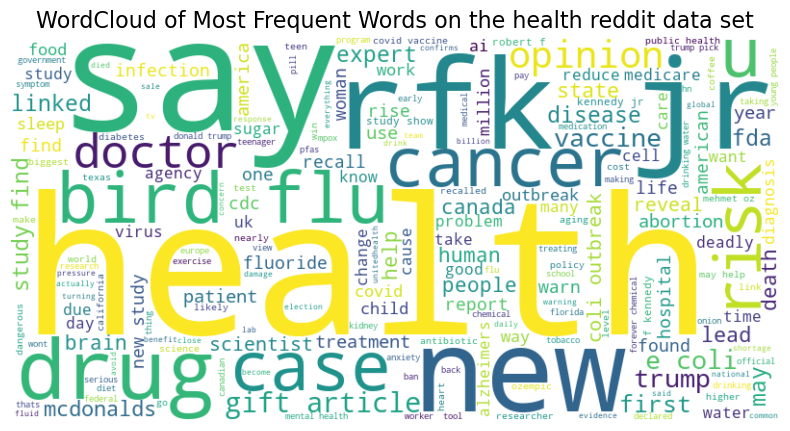

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Create the plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Frequent Words on the health reddit data set', fontsize=16)
plt.show()

#### Bar charts

The bar chart below shows the top authors with the highest number of posts between 10/2/2024 - 11/15/2024 

Nbcnews had the highest number of posts,followed by euronewswnglish, maxcactus, nytopinion, ctvnews, newsweek, newzee, cbsnews, statnews and wirenews.

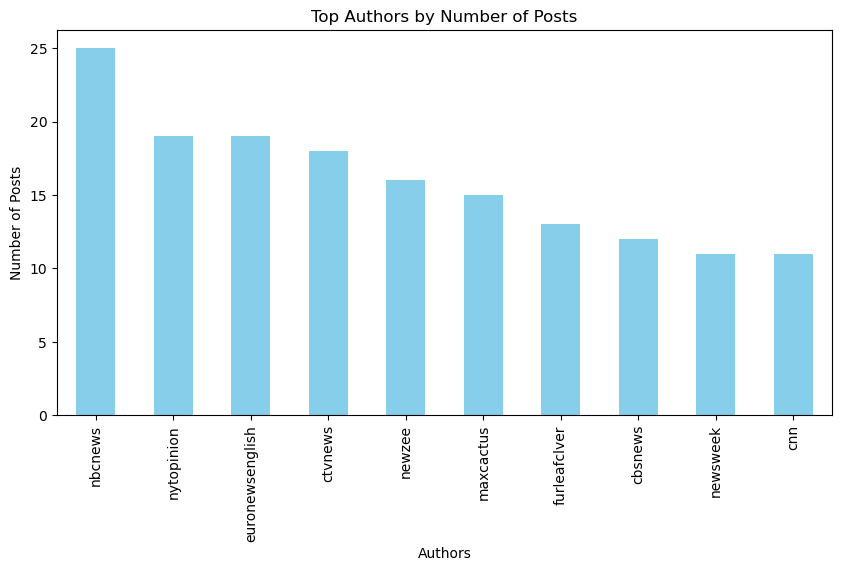

In [113]:
top_authors = clean_data['clean_author_1'].value_counts().head(10)  # Top 10 authors
top_authors.plot(kind='bar', figsize=(10, 5), title='Top Authors by Number of Posts', color='skyblue')
plt.xlabel('Authors')
plt.ylabel('Number of Posts')
plt.show()

The bar chart below shows the top 10 authors with the highest performing titles(topics) - From the bar chat, we can tell that the newzee has the highest performing title and from the previous bar chart newzee was the 7th highest posting author. This means, authors that post frequently may have a chance to having high engagements. High performing post may also be linked to the relevance of the topic of discussion. 

Nbcbews and wiredmagazine that features as part of the top authors with the highest number of post also had 5th and 6th top performing titles. This shows a possiblility that constant posting can impact user enagagement with titles(topics).

Other authors with high perfoming titles(topics) are poltrudes, Exastiken, marji80, nbcnews, wired magazine, asdtyyhfh, hazzman, miolmok, Hazzman, ajn160.

Some of the top performing titles(topics) were authored by individuals.

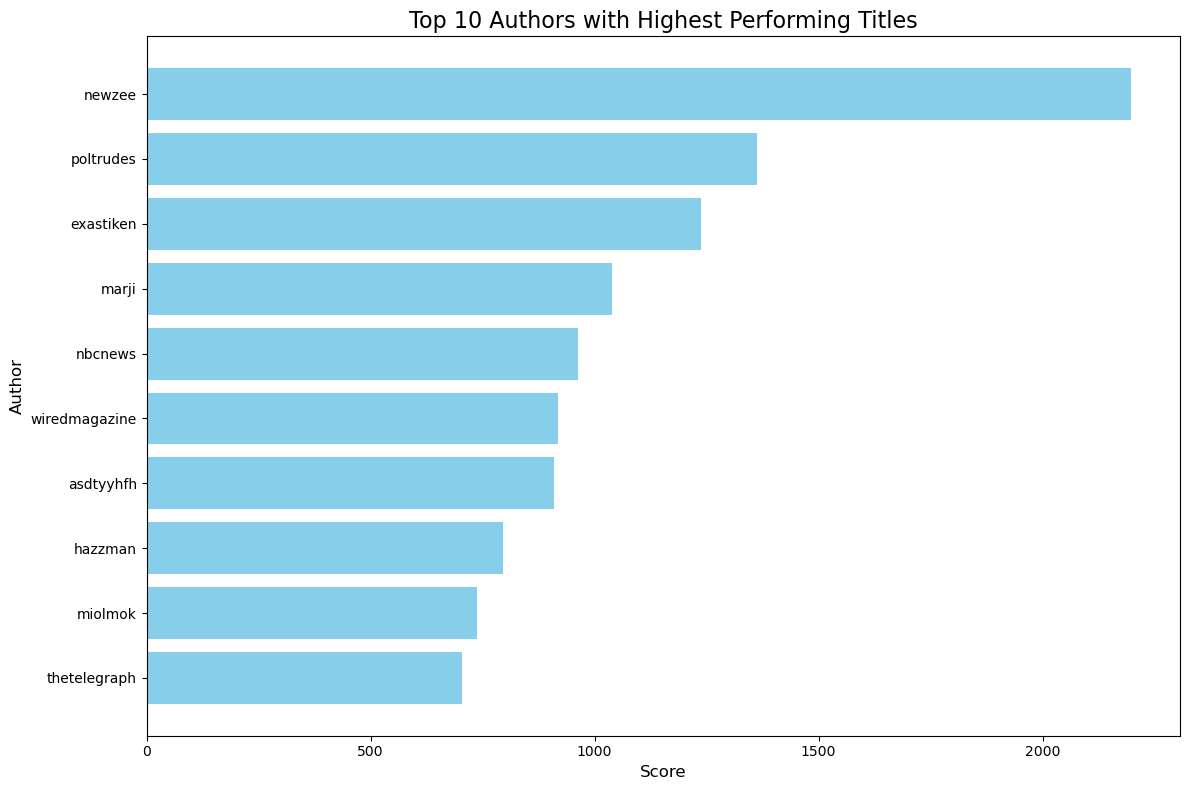

In [121]:
# Find the highest-performing title for the authors
top_titles = clean_data.loc[clean_data.groupby('clean_author_1')['score'].idxmax()]
top_10_authors = top_titles.sort_values(by='score', ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_10_authors['clean_author_1'], top_10_authors['score'], color='skyblue')
plt.xlabel('Score', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.title('Top 10 Authors with Highest Performing Titles', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.tight_layout()
plt.show()

The bar chart below shows the top performing title(topics) based on their score(upvotes).

From the chart, we can see that the highest performing title is "Millions at risk of losing health insurance after Trump's Victory".

The possibility of this post being the highest performing may be linked to the fact that the authors posts often and the discussion is a controversial one inspired by a recently concluded political election.

Please note: I used health_reddit here because the clean_data has undergone some word processing and altered the full topic sentences.

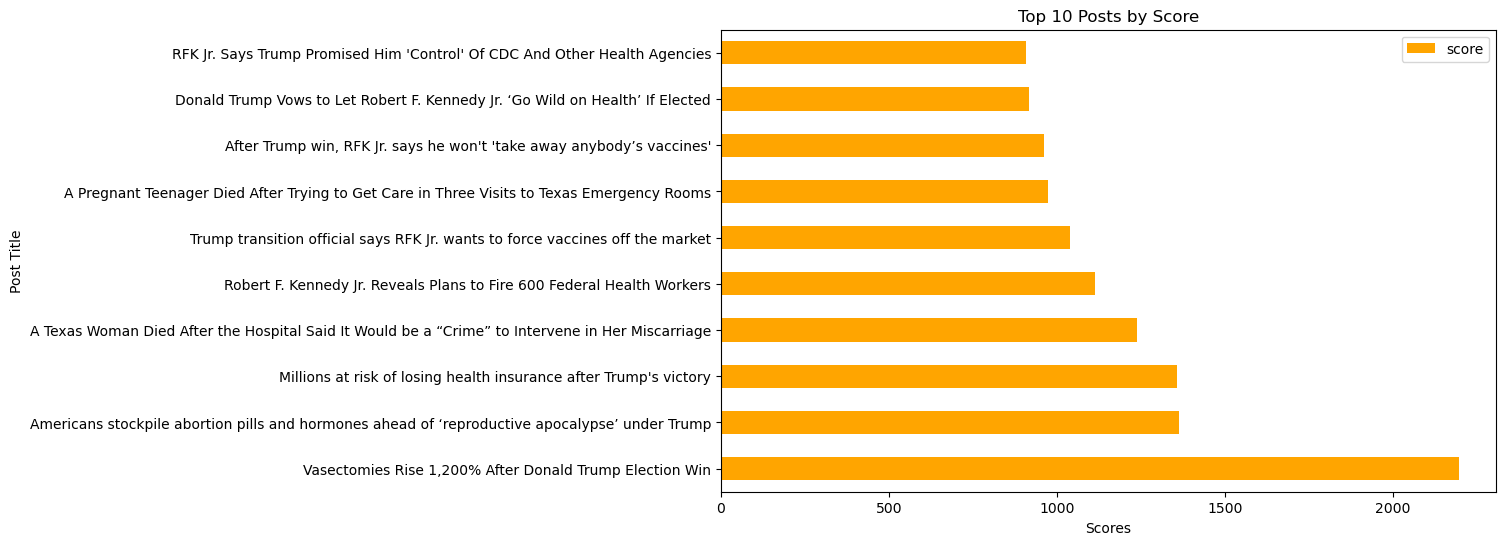

In [127]:
top_posts = health_reddit.nlargest(10, 'score')
top_posts.plot(x='title', y='score', kind='barh', figsize=(10, 6), title='Top 10 Posts by Score', color='orange')
plt.xlabel('Scores')
plt.ylabel('Post Title')
plt.show()

The bar chart below shows the top 10 performing titles(topics) based on the number of comments.

The highest performing title here is "Millions at risk of losing health insurance after Trump's victory" which is also similar to the highest performing post by score.

However, not all posts with high comments have high score(upvtes).

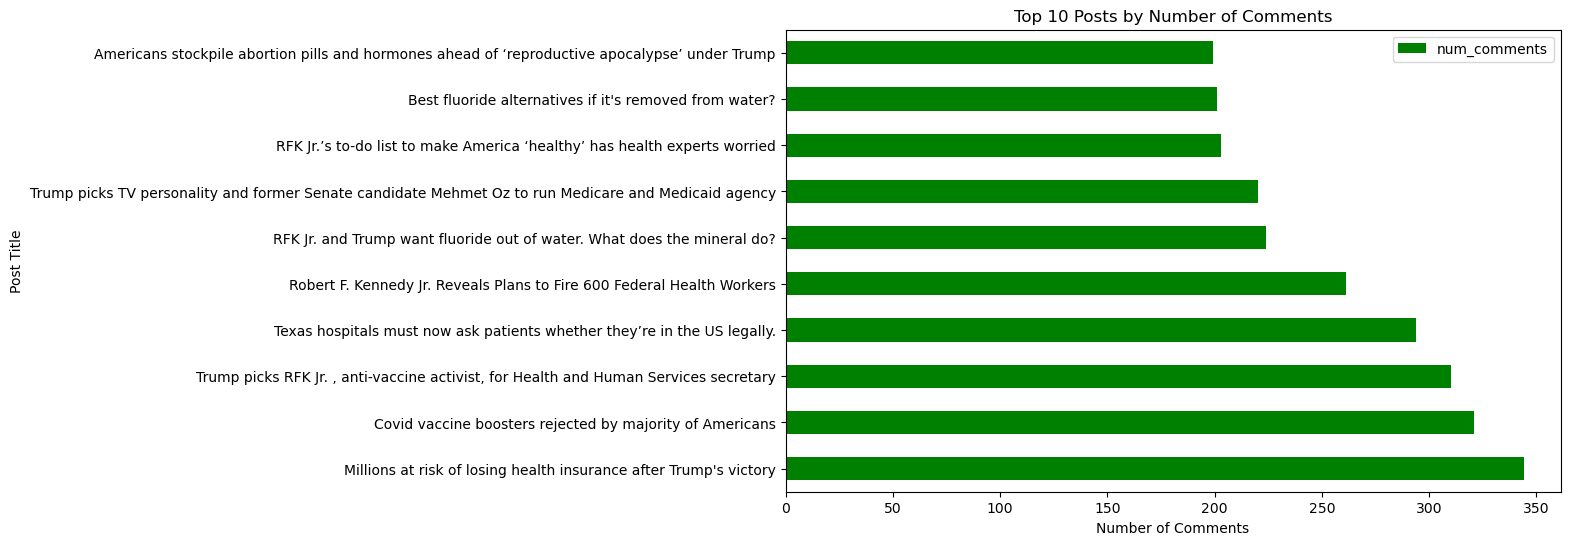

In [130]:
top_comments = health_reddit.nlargest(10, 'num_comments')
top_comments.plot(x='title', y='num_comments', kind='barh', figsize=(10, 6), title='Top 10 Posts by Number of Comments', color='green')
plt.xlabel('Number of Comments')
plt.ylabel('Post Title')
plt.show()

The barchart below shows the top frequently used words in titles.

The top words includes - health, new, study, cancer, flu, jr, bird, says, help, trump.

Some of the words are not medical term but they appeared most in the health titles(topics)

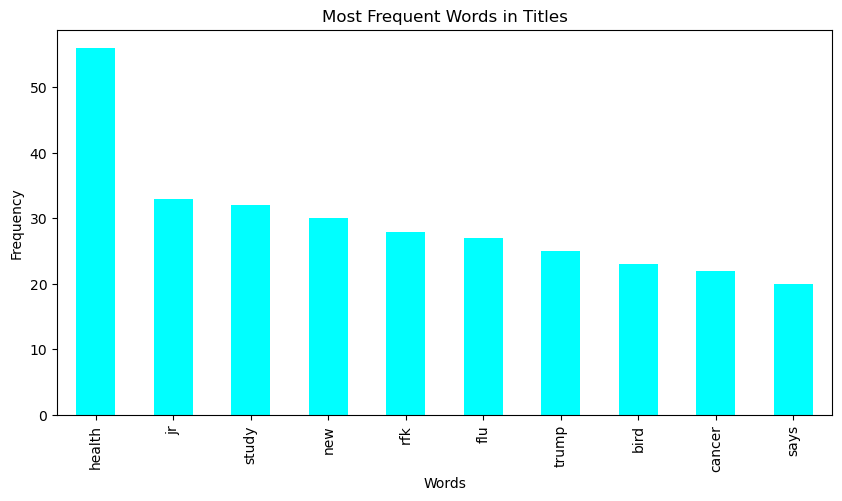

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(health_reddit['title'])
words = vectorizer.get_feature_names_out()
counts = word_counts.toarray().sum(axis=0)

pd.Series(counts, index=words).sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Most Frequent Words in Titles', color='cyan')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

From the bar chart below word performances is compared between the number of comments and scores.

Across the different words used, a high score(upvote/engagement) does not mean the post will have a high number of comments.

            Avg Score  Avg Comments
vaccine    231.714286     36.428571
cancer     159.600000     13.333333
bird flu    89.333333      8.142857
treatment   84.100000      3.100000
study      188.307692     25.461538


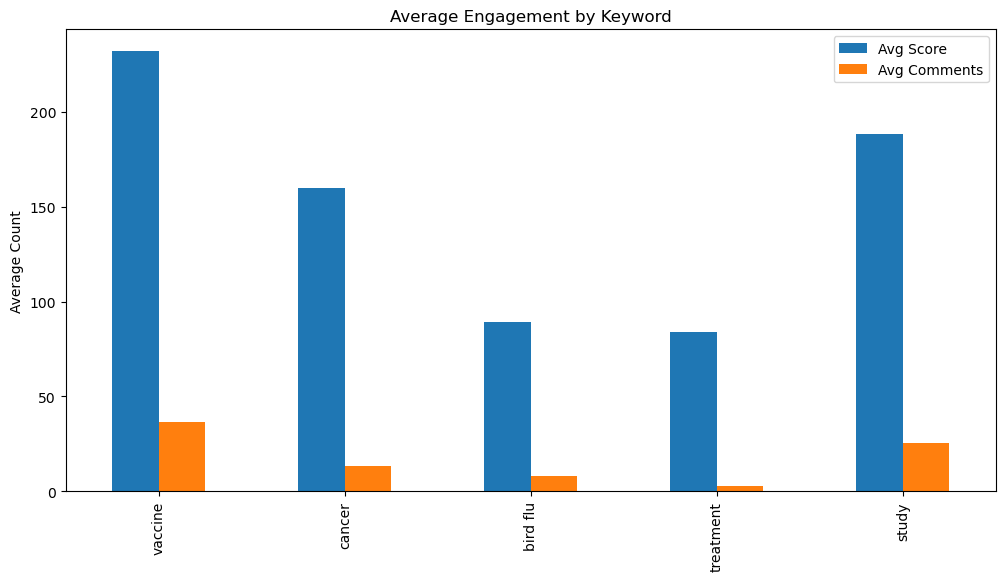

In [287]:
# Calculate average scores and comments by keyword
engagement = {}
for keyword in keywords:
    keyword_posts = clean_data[clean_data['clean_title'].str.contains(keyword, case=False, na=False)]
    avg_score = keyword_posts['score'].mean()
    avg_comments = keyword_posts['num_comments'].mean()
    engagement[keyword] = {'Avg Score': avg_score, 'Avg Comments': avg_comments}

engagement_df = pd.DataFrame(engagement).T

print(engagement_df)

# Visualize engagement
engagement_df.plot(kind='bar', figsize=(12, 6), title='Average Engagement by Keyword')
plt.ylabel('Average Count')
plt.show()


Fromm the trend chart below:

1. 'Vaccine' topics did not gather so much conversations.
2. Topics on 'cancer' peaked btw the 8/11/2024 to 15/11/2024
3. Topics related to 'bird flu' also gained attention on the 01/11/2024 and 22/11/2024
4. Other topics like study and treatment did gather so much engagements.

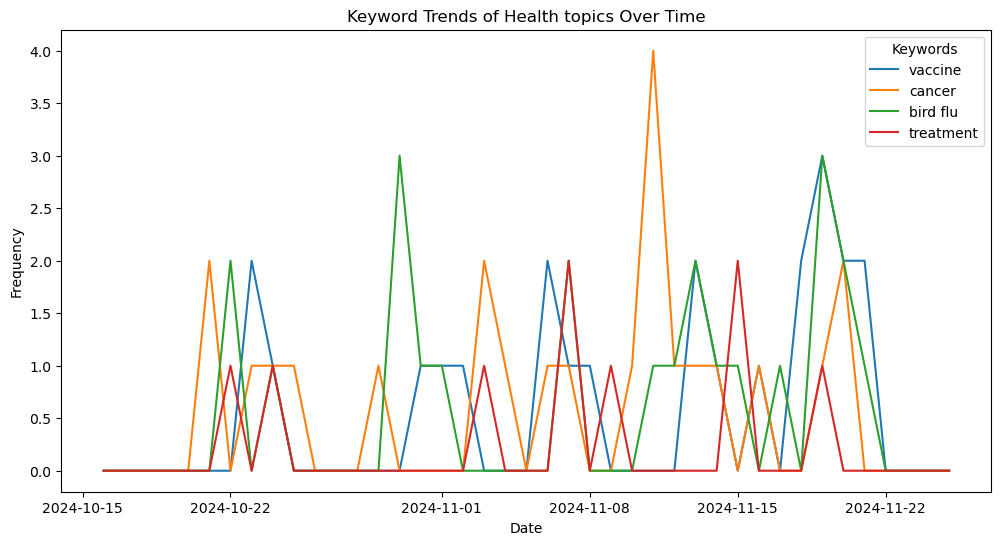

In [144]:
# Convert 'date' column to datetime
clean_data['date'] = pd.to_datetime(clean_data['date'], errors='coerce')

keywords = ['vaccine', 'cancer', 'bird flu', 'treatment']

keyword_trends = pd.DataFrame()

for keyword in keywords:
    keyword_trends[keyword] = clean_data['clean_title_1'].str.contains(keyword, case=False, na=False).groupby(clean_data['date'].dt.date).sum()

keyword_trends.plot(figsize=(12, 6), title='Keyword Trends of Health topics Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Keywords')
plt.show()

The pie chart below shows the top 10 most active authors based on their number of posts.

Nbcnews showed the highest with 25.1% while statnews and wiredmagazine showed 7% respectively

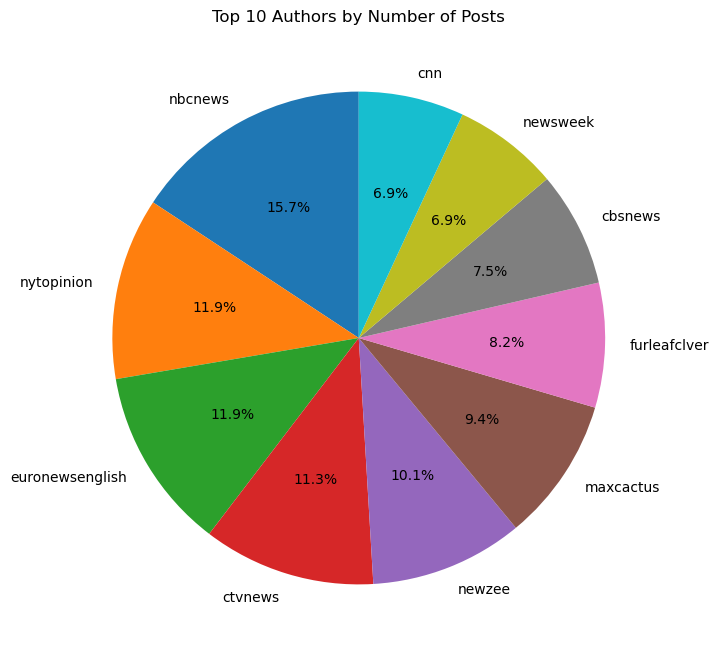

In [150]:
author_counts = clean_data['clean_author_1'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(author_counts.head(10), labels=author_counts.head(10).index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Authors by Number of Posts')
plt.show()


### Step 4: Ask question about your data


1. Design an hypothesis test and regression model to identify the relationship between post scores and the number of comments.

  
a.  What are the underlying latent topics in the post titles? How do these topics relate to the sentiment of the posts, and what is the sentiment trend over time?

b. How does the number of comments influence the score (upvotes - downvotes) of a Reddit post? - Explain with a heatmap and display the top output of titles(topic), score and comments.

c. Display the highest performing post title by score.

d. Display highest performing post title by number of comments.

e. What is the least performing post.

f. List the least 5 performing posts.

g. Using a doughnut chart, display the top 10 performing titles(topics).

#### Answers

##### The scatter plot below shows a weak relationship (correlation) between number of comments and the score with most posts having low comments and scores

The scatterplot shows that as the number of comments on a post increases, its score tends to rise, though not always.

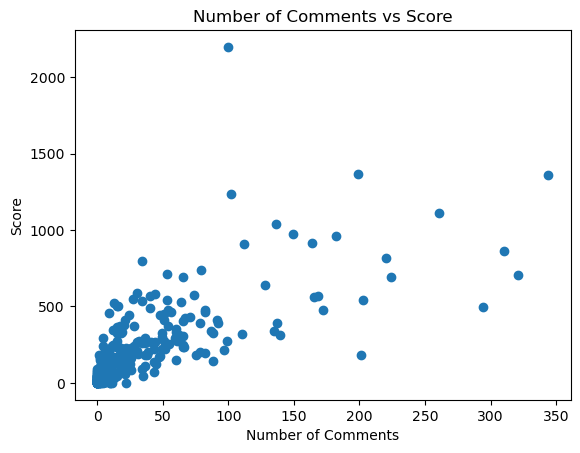

In [158]:
plt.scatter(clean_data['num_comments'], df['score'])
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.title('Number of Comments vs Score')
plt.show()


#### Model training and testing by splitting data

80% of the data will be used for training the model, while 20% will be used for testing it.

In [177]:
from sklearn.model_selection import train_test_split
X = df[['num_comments']]
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression model fitting to train the dataset

In [162]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##### Evaluating the performance of the trained linear regression model by calculating the Mean squared error and the R-squared score of the test data

The Mean squared error shown below shows that the prediction of the model is far from the actual value and thus needs improvement for accuracy

The R squared score below shows that about 42% of changes in the data which means more featured need to be captured by the model to imrpove accuracy.

In [164]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R^2 Score: {r2}')

MSE: 78911.93485707926
R^2 Score: 0.41597277723795034


#### Plot shhowing regression line on data points

The scatterplot shows actual vs. predicted post scores, where the regression line (red) shows the relationship between number of comments and scores.

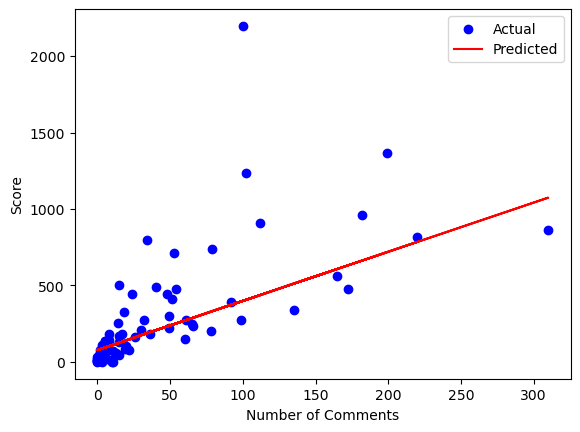

In [166]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Number of Comments')
plt.ylabel('Score')
plt.legend()
plt.show()

#### Transform feature to polynomial regression

In [202]:
from sklearn.preprocessing import PolynomialFeatures
# Prepare your data
X = clean_data[['num_comments']]  # Feature
y = clean_data['score']  # Target

# Split data to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial characteristics
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#### Train the polynomial regression model

In [185]:
#Start model
model = LinearRegression()

# Fit models
model.fit(X_train_poly, y_train)

LinearRegression()

In [187]:
# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R² Score: {r2}')


MSE: 70122.55077393666
R² Score: 0.48102300804478293


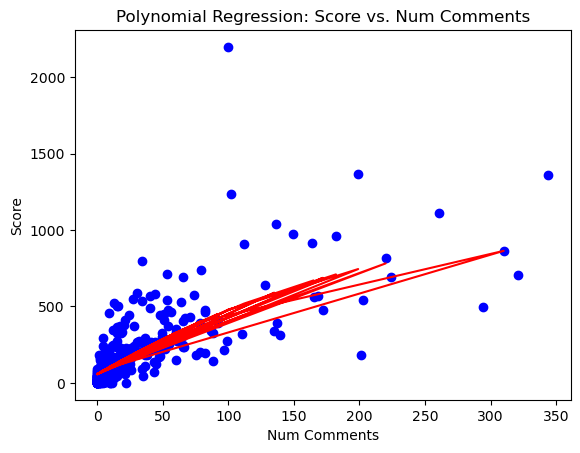

In [189]:
# Plot data points & polynomial regression curve
plt.scatter(X, y, color='blue')  # Actual data points
plt.plot(X_test, y_pred, color='red')  # Predicted polynomial regression curve
plt.title('Polynomial Regression: Score vs. Num Comments')
plt.xlabel('Num Comments')
plt.ylabel('Score')
plt.show()


Answer 1b. Sentiment trend over time based on the latent topics in the post titles.

In [250]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

all_titles = clean_data['clean_title_1'].dropna().tolist() 

# Perform topic modeling on the full dataset
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
title_vectors = vectorizer.fit_transform(all_titles)

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(title_vectors)

for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])



Topic 1:
['america', 'new', 'trump', 'vaccine', 'gift', 'article', 'opinion', 'rfk', 'jr', 'health']
Topic 2:
['new', 'risk', 'cancer', 'doctor', 'case', 'flu', 'say', 'study', 'health', 'canada']
Topic 3:
['kennedy', 'cdc', 'flu', 'rfk', 'say', 'health', 'mcdonalds', 'jr', 'coli', 'outbreak']
Topic 4:
['trump', 'antibiotic', 'doctor', 'american', 'new', 'cancer', 'study', 'use', 'say', 'health']
Topic 5:
['reveals', 'risk', 'help', 'case', 'people', 'new', 'flu', 'bird', 'drug', 'study']


In [215]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
title_vectors = vectorizer.fit_transform(clean_data['clean_title_1'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(title_vectors)

# Assign topics
topic_assignments = lda_model.transform(title_vectors).argmax(axis=1)
clean_data['topic'] = topic_assignments

# Calculation of sentiment
clean_data['sentiment'] = clean_data['clean_title_1'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group the sentiment by topics
topic_sentiment = clean_data.groupby('topic')['sentiment'].mean()
print(topic_sentiment)


topic
0    0.066895
1    0.049936
2   -0.002920
3    0.013255
4    0.023000
Name: sentiment, dtype: float64


The sentiment analysis below shows a change in emotional tones in the posts over time, with occasional spikes suggesting reactions to specific events or trending topics. 

Generally, the sentiment shifts between neutral, positive, and negative.

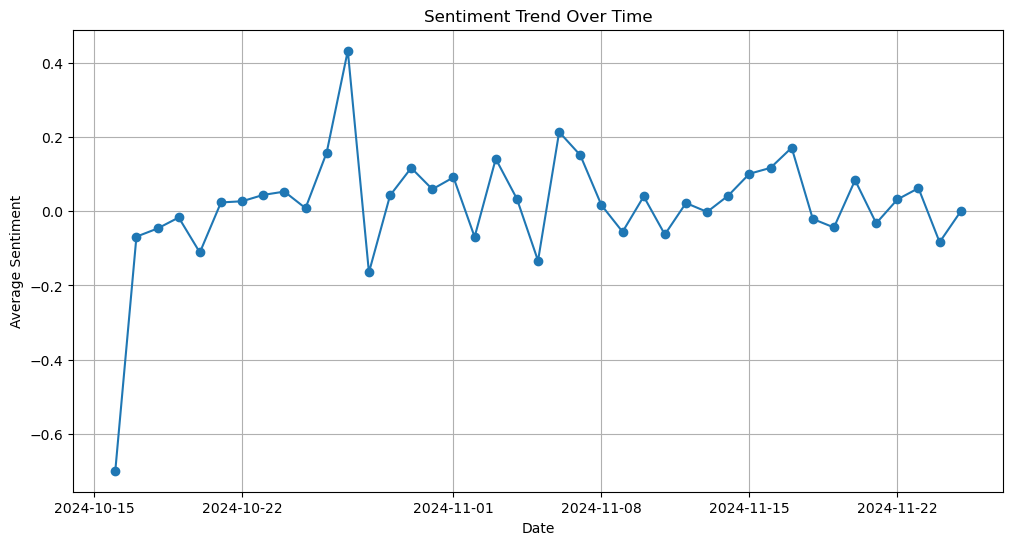

In [223]:
# Group by date
clean_data['date'] = pd.to_datetime(df['date'])
sentiment_trend = clean_data.groupby(clean_data['date'].dt.date)['sentiment'].mean()

# Plot sentiment
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trend.index, sentiment_trend.values, marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()


Answer 1c: Relationship between score and num_comments using heatmap.

From the heatmap shown below a correlation of 0.73 shows that posts with higher score are likely too have more comments. This means popular posts may likely spark engagements. 

However, it does not necessarily mean that a higher score directly causes more connection, it just shows there is a strong relationship between the two.

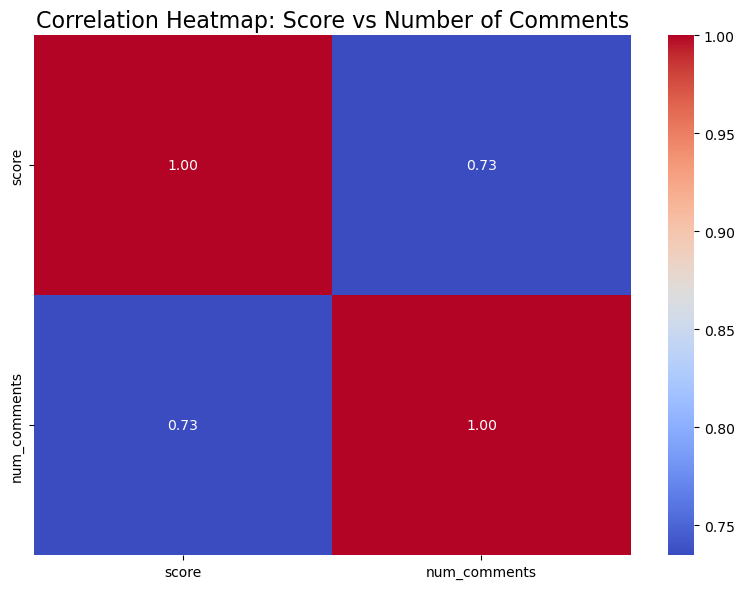

In [230]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

if 'score' not in clean_data.columns or 'num_comments' not in clean_data.columns:
    raise ValueError("The dataset must contain 'score' and 'num_comments' columns.")

correlation_matrix = clean_data[['score', 'num_comments']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    cbar=True
)
plt.title('Correlation Heatmap: Score vs Number of Comments', fontsize=16)
plt.tight_layout()
plt.show()



Answer 1c - Display title, num_comments and score

In [719]:
author_posts[['title', 'num_comments', 'score']]

,title,num_comments,score
10,CDC confirms Oregon’s first human case of bird flu,40,258
19,"Trump picks RFK Jr. , anti-vaccine activist, for Health and Human Services secretary",312,857
24,"FDA employees consider how to handle RFK Jr., including leaving",52,281
54,Sudden syphilis retreat in gay men is most likely tied to preventive antibiotic use,2,44
57,Cutting-edge test uses DNA sequencing to yield diagnoses for some medical mysteries,0,4
87,Study maps how nonprofit religious groups set up facilities near abortion clinics,1,40
106,"After Trump win, RFK Jr. says he won't 'take away anybody’s vaccines'",182,961
116,"Abortion rights ballot measures pass in 7 states, fail in 3 others",11,239
154,Trump team fully embraces RFK Jr.'s vaccine skepticism,22,211
173,CDC says slivered onions are likely cause of McDonald's E. coli infections as cases rise to 90,2,97


Answer 1d: Display the highest performing post title by score.

In [32]:
highest_performing_post = df.sort_values(by='score', ascending=False).iloc[0]

print(f"Highest Performing Post Title: {highest_performing_post['clean_title']}")
print(f"Score: {highest_performing_post['score']}")


Highest Performing Post Title: million risk losing health insurance trump victory
Score: 1361


Answer 1e: Display highest performing post title by number of comments.

In [30]:
most_commented_post = df.sort_values(by='num_comments', ascending=False).iloc[0]

print(f"Most Commented Post Title: {most_commented_post['clean_title']}")
print(f"Number of Comments: {most_commented_post['num_comments']}")


Most Commented Post Title: million risk losing health insurance trump victory
Number of Comments: 346


Answer 1f - What is the least performing post.

In [34]:
least_performing_post = df.sort_values(by='score', ascending=True).iloc[0]

print(f"Least Performing Post Title: {least_performing_post['clean_title']}")
print(f"Score: {least_performing_post['score']}")


Least Performing Post Title: doctor warning diet drink especially woman
Score: 0


Answer 1g - List the least 5 performing posts.

In [552]:
least_5_posts = df.sort_values(by='score', ascending=True).head(5)
print(least_5_posts[['title', 'score']])


                                                 title  score
307  Doctor has warning over diet drinks, especiall...      0
356  I’m a doctor — here’s why you should never pee...      0
6    Are standing desks good for you? The answer is...      0
277  5 Gastroenterologists on the 1 Thing You Shoul...      0
71   Opinion | Wellness Should be Just a Hobby (Gif...      0


Answer 1f- Use a doughnut chart to identify represent the represent the top 10 performing title by score

C:\Users\Admin\AppData\Local\Temp\ipykernel_20300\2540350664.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


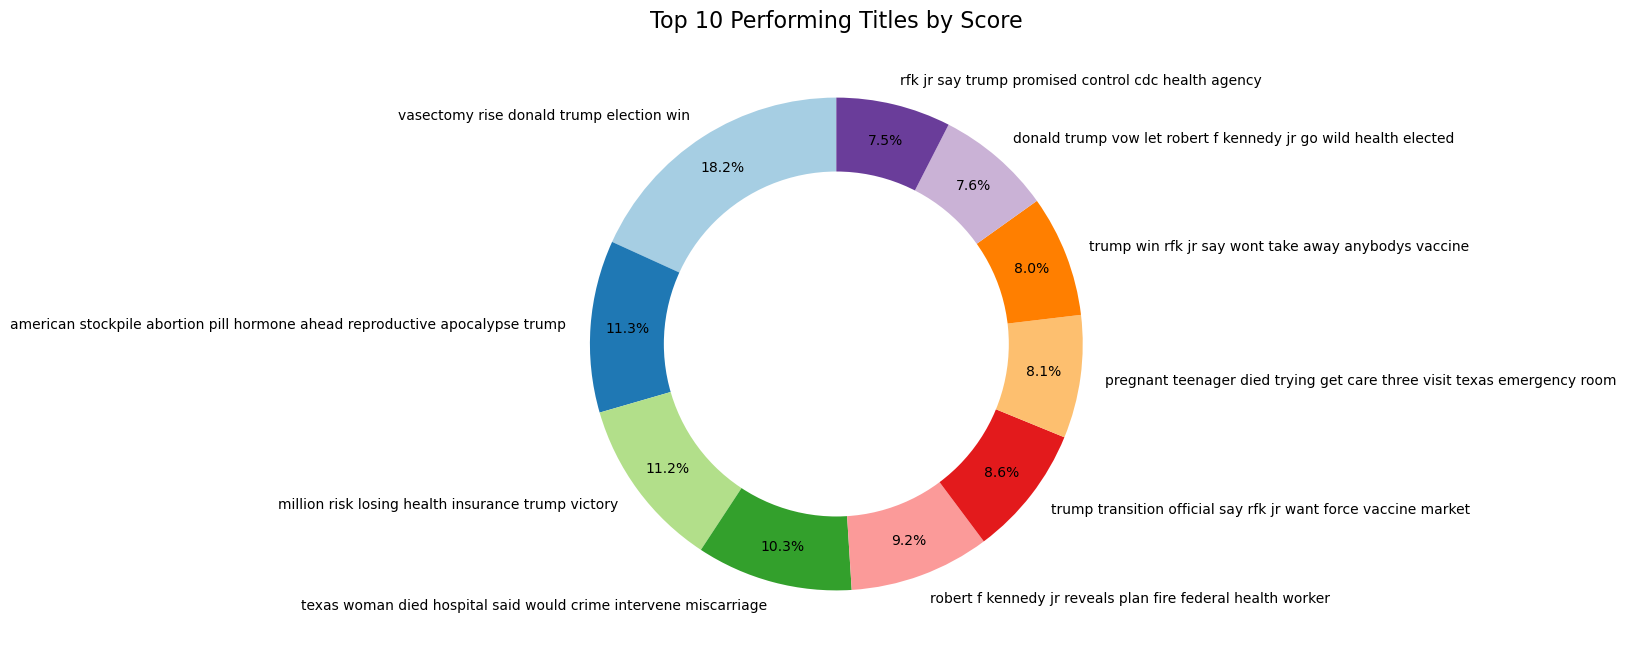

In [241]:
if 'clean_title_1' not in clean_data.columns or 'score' not in df.columns:
    raise ValueError("The dataset must have 'clean_title_1' and 'score' columns.")


# Top 10 titles
top_10_titles = clean_data.nlargest(10, 'score')

labels = top_10_titles['clean_title_1']
scores = top_10_titles['score']

# Create doughnut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    scores, labels=labels, autopct='%1.1f%%', startangle=90,
    pctdistance=0.85, colors=plt.cm.Paired(range(len(labels)))
)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

plt.title('Top 10 Performing Titles by Score', fontsize=16)
plt.tight_layout()
plt.show()


### Step 5: Summarise 

The reddit website is an easy and reliable platfrom to webscrape data with well detailed data sets.

#### Title(Post) performance
From the analysis comducted, we identified the most discussed topic - "Millions at risk of losing health insurance after Trump's victory", this title(topic) accumulated the highest score and comments. Other topics had varying frequency in comments and score suggesting that a high score does not indicate that a topic will generate lots oF comments.

#### Author performance
The author with the highest number of posts - nbsnews is not the author with the highest performing title(topic). However the data shows that authors that post the most does not neccessary have the highest engagement. It is a function of the title of discussion. 

Nbcbews and wiredmagazine that features as part of the top authors with the highest number of post also had 5th and 6th top performing titles. This shows a possiblility that constant posting can impact user enagagement with titles(topics). 

The highest performing post in this research is a function of posts with a high score and comments. This may have beeno[i because the title (topic) a health based post has some element of politics.

#### From the sentiment analysis
The sentiment analysis highlights a change in emotional tones in the posts over time, with occasional increase suggesting reactions to specific events or trending topics. 

Generally, the sentiment shifts between neutral, positive, and negative.

#### From the hypothesis testing and Regression


### Conclusion

Posts with high scores tend to have more comments, thereby highlighting a strong relationship between title(topic) popularity and engagement. This does not mean that scores are the direct cause of having high comments. it is just a trend.

Future work may want to explore more on sentimental analysis and topic modelling using Natural Language Processing. The impact of time of the day on engagement as well as comparison of engagement across other subreddits in the reddit website or other health websites.

Future work should alo explore the use of decision three and other hypothesis testing for predicting the performances of topics on social forums and social media.

Some dataset sources that are relevant to this topic can be found on:

Kaggle for health related post - https://www.kaggle.com/

Student doctor network - https://forums.studentdoctor.net/forums/

Heartforums.net - https://heart-failure.net/


